**Классификация текста**

Разработаем классификатор для определения спам/не спам сообщений с использованием различных методов предобработки текста и векторизации.

In [ ]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/MyDrive/spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
data1 = data[['v1', 'v2']]
print(data1.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


<Axes: xlabel='v1', ylabel='count'>

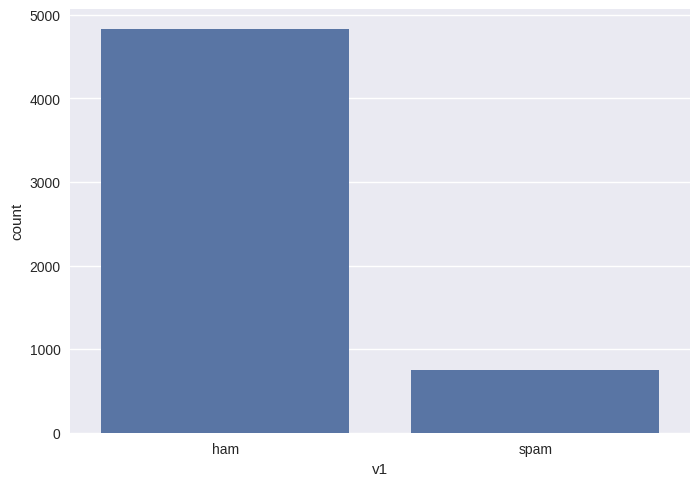

In [ ]:
sns.countplot(data=data, x="v1")

In [ ]:
!pip install nltk
!pip install pymorphy2

# nltk — библиотека для обработки естественного языка, предоставляющая инструменты для работы с текстами и анализа языка.

In [ ]:
# Импорт библиотеки nltk
import nltk
import re
from nltk.stem import  WordNetLemmatizer
from nltk.corpus import wordnet
import pymorphy2
from nltk.stem.snowball import SnowballStemmer

# Загрузка набора данных 'punkt' для токенизации текста
nltk.download('punkt')
nltk.download("stopwords") # поддерживает удаление стоп-слов
nltk.download('wordnet') # проводит лемматизацию

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatize = nltk.WordNetLemmatizer()

In [ ]:
data1.v2

,v2
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
clear_text = []

for i in data1.v2:
  text = re.sub("[^a-zA-Z]", " ", i)
  # токенизируем слова
  text = nltk.word_tokenize(text, language = "english")
  # лемматирзируем слова
  text = [lemmatize.lemmatize(word) for word in text]
  # соединяем слова
  text = " ".join(text)
  clear_text.append(text)

clear_text[:5]

['Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry in a wkly comp to win FA Cup final tkts st May Text FA to to receive entry question std txt rate T C s apply over s',
 'U dun say so early hor U c already then say',
 'Nah I don t think he go to usf he life around here though']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(clear_text).toarray()
vectorizer.get_feature_names_out()
print(X.shape)
y = data.v1
print(y.shape)

(5572, 7034)
(5572,)


In [ ]:
y = y.apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
y

,v1
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result_bayes = nb.fit(X_train, y_train)
nb.score(X_test,y_test)

0.8716693855356172

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
result_logreg = logreg.fit(X_train, y_train)
logreg.score(X_test,y_test)

0.9461663947797716

In [ ]:
from sklearn import svm
metodsvm = svm.SVC()
result_svm = metodsvm.fit(X_train, y_train)
metodsvm.score(X_test, y_test)

In [ ]:
X_train[0].shape

(7034,)

In [ ]:
X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(7034,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
data.dtypes

,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [ ]:
history=model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(X_test,y_test))

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.6859 - loss: 0.6782 - val_accuracy: 0.8630 - val_loss: 0.6286
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8689 - loss: 0.6087 - val_accuracy: 0.8630 - val_loss: 0.5498
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8734 - loss: 0.5227 - val_accuracy: 0.8630 - val_loss: 0.4653
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8640 - loss: 0.4403 - val_accuracy: 0.8630 - val_loss: 0.3903
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8696 - loss: 0.3612 - val_accuracy: 0.8630 - val_loss: 0.3326
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8680 - loss: 0.3040 - val_accuracy: 0.8630 - val_loss: 0.2873
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8637 - loss: 0.2633 - val_accuracy: 0.8728 - val_loss: 0.2506
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8839 - loss: 0.2200 - val_accuracy: 0.9065 - val_loss: 0.2173

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
history_dict['accuracy']

[0.7873024344444275,
 0.8673988580703735,
 0.8673988580703735,
 0.8673988580703735,
 0.8673988580703735,
 0.8673988580703735,
 0.8695419430732727,
 0.8933833241462708,
 0.9308866858482361,
 0.9509777426719666,
 0.9641039371490479,
 0.9748191833496094,
 0.9812483191490173,
 0.9876774549484253,
 0.9892847537994385,
 0.9911599159240723,
 0.9924993515014648,
 0.9951781630516052,
 0.9962496757507324,
 0.9981248378753662]

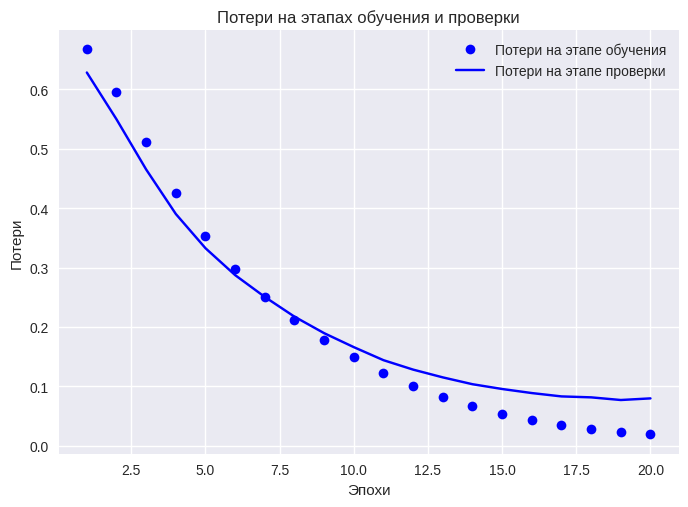

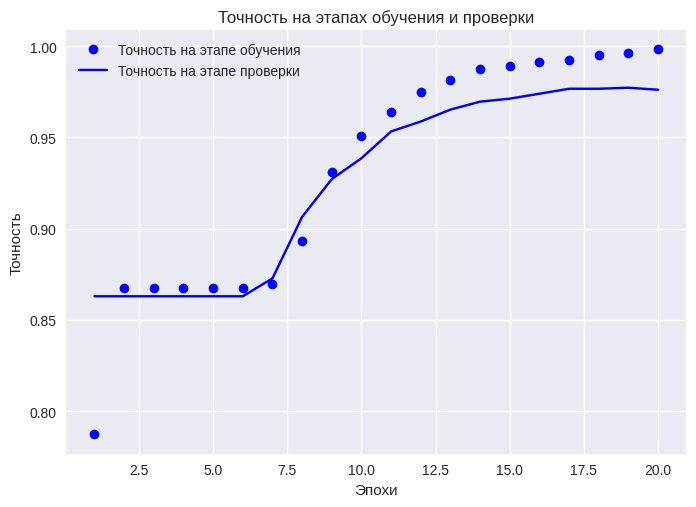

In [ ]:
# построение графика потери на этапах проверки и обучения
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)

# построение графика потери на этапах проверки и обучения
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label = 'Потери на этапе обучения')
plt.plot(epochs, val_loss_values, 'b', label = 'Потери на этапе проверки')
plt.title('Потери на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# построение графика точности на этапах обучения и проверки
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Точность на этапе обучения')
plt.plot(epochs, val_acc_values, 'b', label = 'Точность на этапе проверки')
plt.title('Точность на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()